# Playstore Apps Analysis and Prediction Project

## Problem Statement:
The requirment of the project is to create a web service in which you could add the details of your application and it would predict the number of installs that your application could gain. another page would be created to direct you to the optimum application properties through which you could be able to improve the success of your application.

In [2]:
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

## Step 1: Understanding the Domain and Project Requirements:

- collection of applications data from playstore
- data cleaning through piplines
- analysing apps data and create insights for:
    
    *all these analysis is for specifying the perfect combination to have an application with high number of installs*
    - from the company column:
        - relationship between company and number of installs 
        - relationship between company and number of comments on the application
        - relationship between company and app rating
        - relationship between company and number of reports/ reports type    
    - from the underTitle column:
        - relationship between the title of app recommendation and the number of installs 
        - if there is a reltionship between the repetitive app appearance under multiple titles and the number of installs
    - from the gener column:
        - relationship between gener and number of installs
        - relationship between gener and number of comments
        - relationship between gener and updateing date (is a specific gener less updated than others)
        - relationship between gener and size of application
        - relationship between gener and android version
        - relationship between gener and type and number of interactive elements needed for the application development
        - relationship between gener and number of reports
        - relationship between gener and price of app_purchases
    - from the number of comments column:
        - relationship between number of comments and number of installs
        - relationship between number of comments and the existance of interactive elements
        - relationship between number of comments and the app reporting
        - relationship between number of comments and the price of in_app_purchases
    - from the size column:
        - relationship between size of app and the android version supported
        - relationship between size of app and the interactive elements in app
        - relationship between size of app and the number of comments
        - relationship between size of app and the number of installs


- create a ML predictive model for:
    - predicting the number of installs for a given unknown application
    - clustering applications according to number of installs 
    - perform dimentionality reduction to reduce number of features
    - anomaly detection to find hidden patterns between data

# Step 2: Data Collection:
 the data collection process was performed in the jupyter file of title "scrapping.ipynb"

In [3]:
df = pd.read_csv('firstpageApps.csv',index_col=0)
df.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,latest_Update,size,Installs,android_Version_Supported,InterActive_Elem,content_Rating,Report,In-app_Purchases
0,YouTube,Google LLC,4.3,Recommended for you,0,Video Players & Editors,121306065,1,"August 26, 2021",Varies with device,"10,000,000,000+",Varies with device,"Users Interact, Digital Purchases",TeenLearn more,Flag as inappropriate,NaN
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0,Arcade,36209360,1,"August 12, 2021",174M,"1,000,000,000+",4.4 and up,In-Game Purchases,Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,$0.99 - $99.99 per item
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0,Entertainment,11979087,1,"August 26, 2021",Varies with device,"1,000,000,000+",Varies with device,NaN,TeenLearn more,Flag as inappropriate,$7.99 - $13.99 per item
3,Instagram,Instagram,3.8,Recommended for you,0,Social,123499183,1,"August 23, 2021",Varies with device,"1,000,000,000+",Varies with device,"Users Interact, Shares Info, Shares Location",TeenLearn more,Flag as inappropriate,$0.99 - $4.99 per item
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0,Casual,3859794,1,"August 18, 2021",126M,"100,000,000+",5.0 and up,Digital Purchases,EveryoneComic MischiefLearn more,Flag as inappropriate,$0.99 - $99.99 per item


## a) understand better the data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   57 non-null     object 
 1   app_company                57 non-null     object 
 2   app_rating                 57 non-null     float64
 3   underTitle                 57 non-null     object 
 4   app_price                  57 non-null     int64  
 5   gener                      57 non-null     object 
 6   noOfComments               57 non-null     int64  
 7   page_index                 57 non-null     int64  
 8   latest_Update              57 non-null     object 
 9   size                       57 non-null     object 
 10  Installs                   57 non-null     object 
 11  android_Version_Supported  57 non-null     object 
 12  InterActive_Elem           45 non-null     object 
 13  content_Rating             57 non-null     object 
 

- interactive elements contain 45 non null elements = 12 Nones - no interactive elements used in the app
- in-app_purchases contain 36 non null elemenets = 21 Nones - contains no in-app purchases
**this may be due tothe existance of apps containing no interactive elements or in-app purchases

In [5]:
 df.describe()

,app_rating,app_price,noOfComments,page_index
count,57.000000,57.0,5.700000e+01,57.0
mean,4.147368,0.0,2.273440e+07,1.0
std,0.527496,0.0,3.798016e+07,0.0
min,2.300000,0.0,3.216900e+04,1.0
25%,4.100000,0.0,2.348847e+06,1.0
50%,4.300000,0.0,7.178970e+06,1.0
75%,4.400000,0.0,1.921726e+07,1.0
max,4.800000,0.0,1.434896e+08,1.0


### some visualizations to understand the data

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


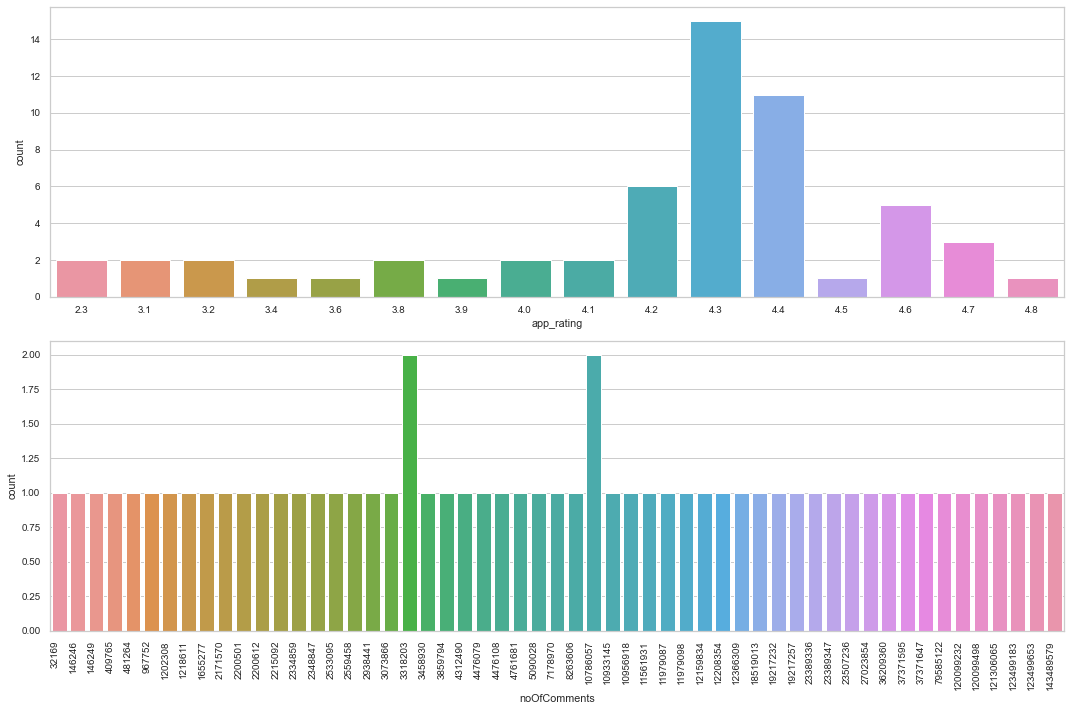

In [6]:
sns.set(rc={'figure.figsize': [15,10]}, font_scale=0.9, style='whitegrid')
plt.subplot(2,1,1)
sns.countplot(df['app_rating'])
plt.subplot(2,1,2)
ax = sns.countplot(df['noOfComments'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

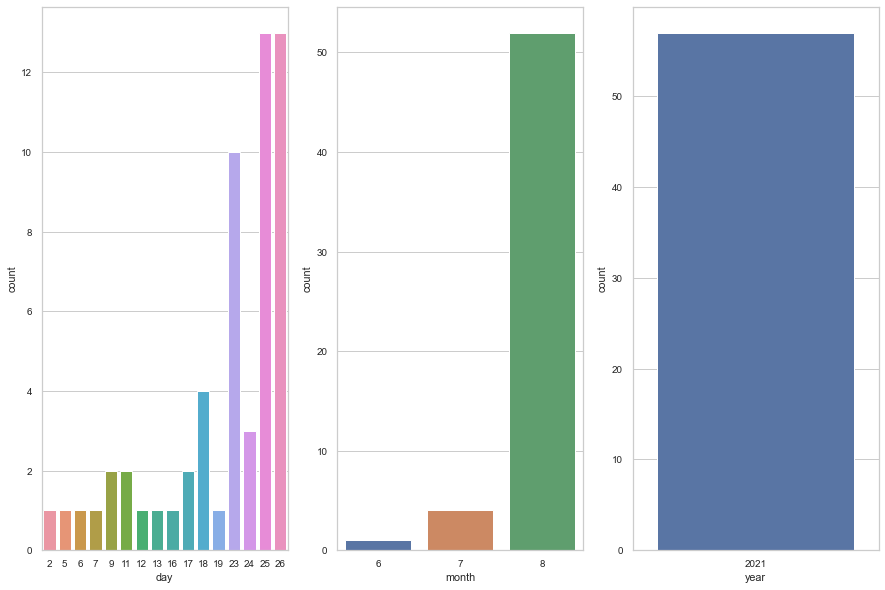

In [56]:
plt.subplot(1,3,1)
sns.countplot(df['day'])
plt.subplot(1,3,2)
sns.countplot(df['month'])
plt.subplot(1,3,3)
sns.countplot(df['year'])

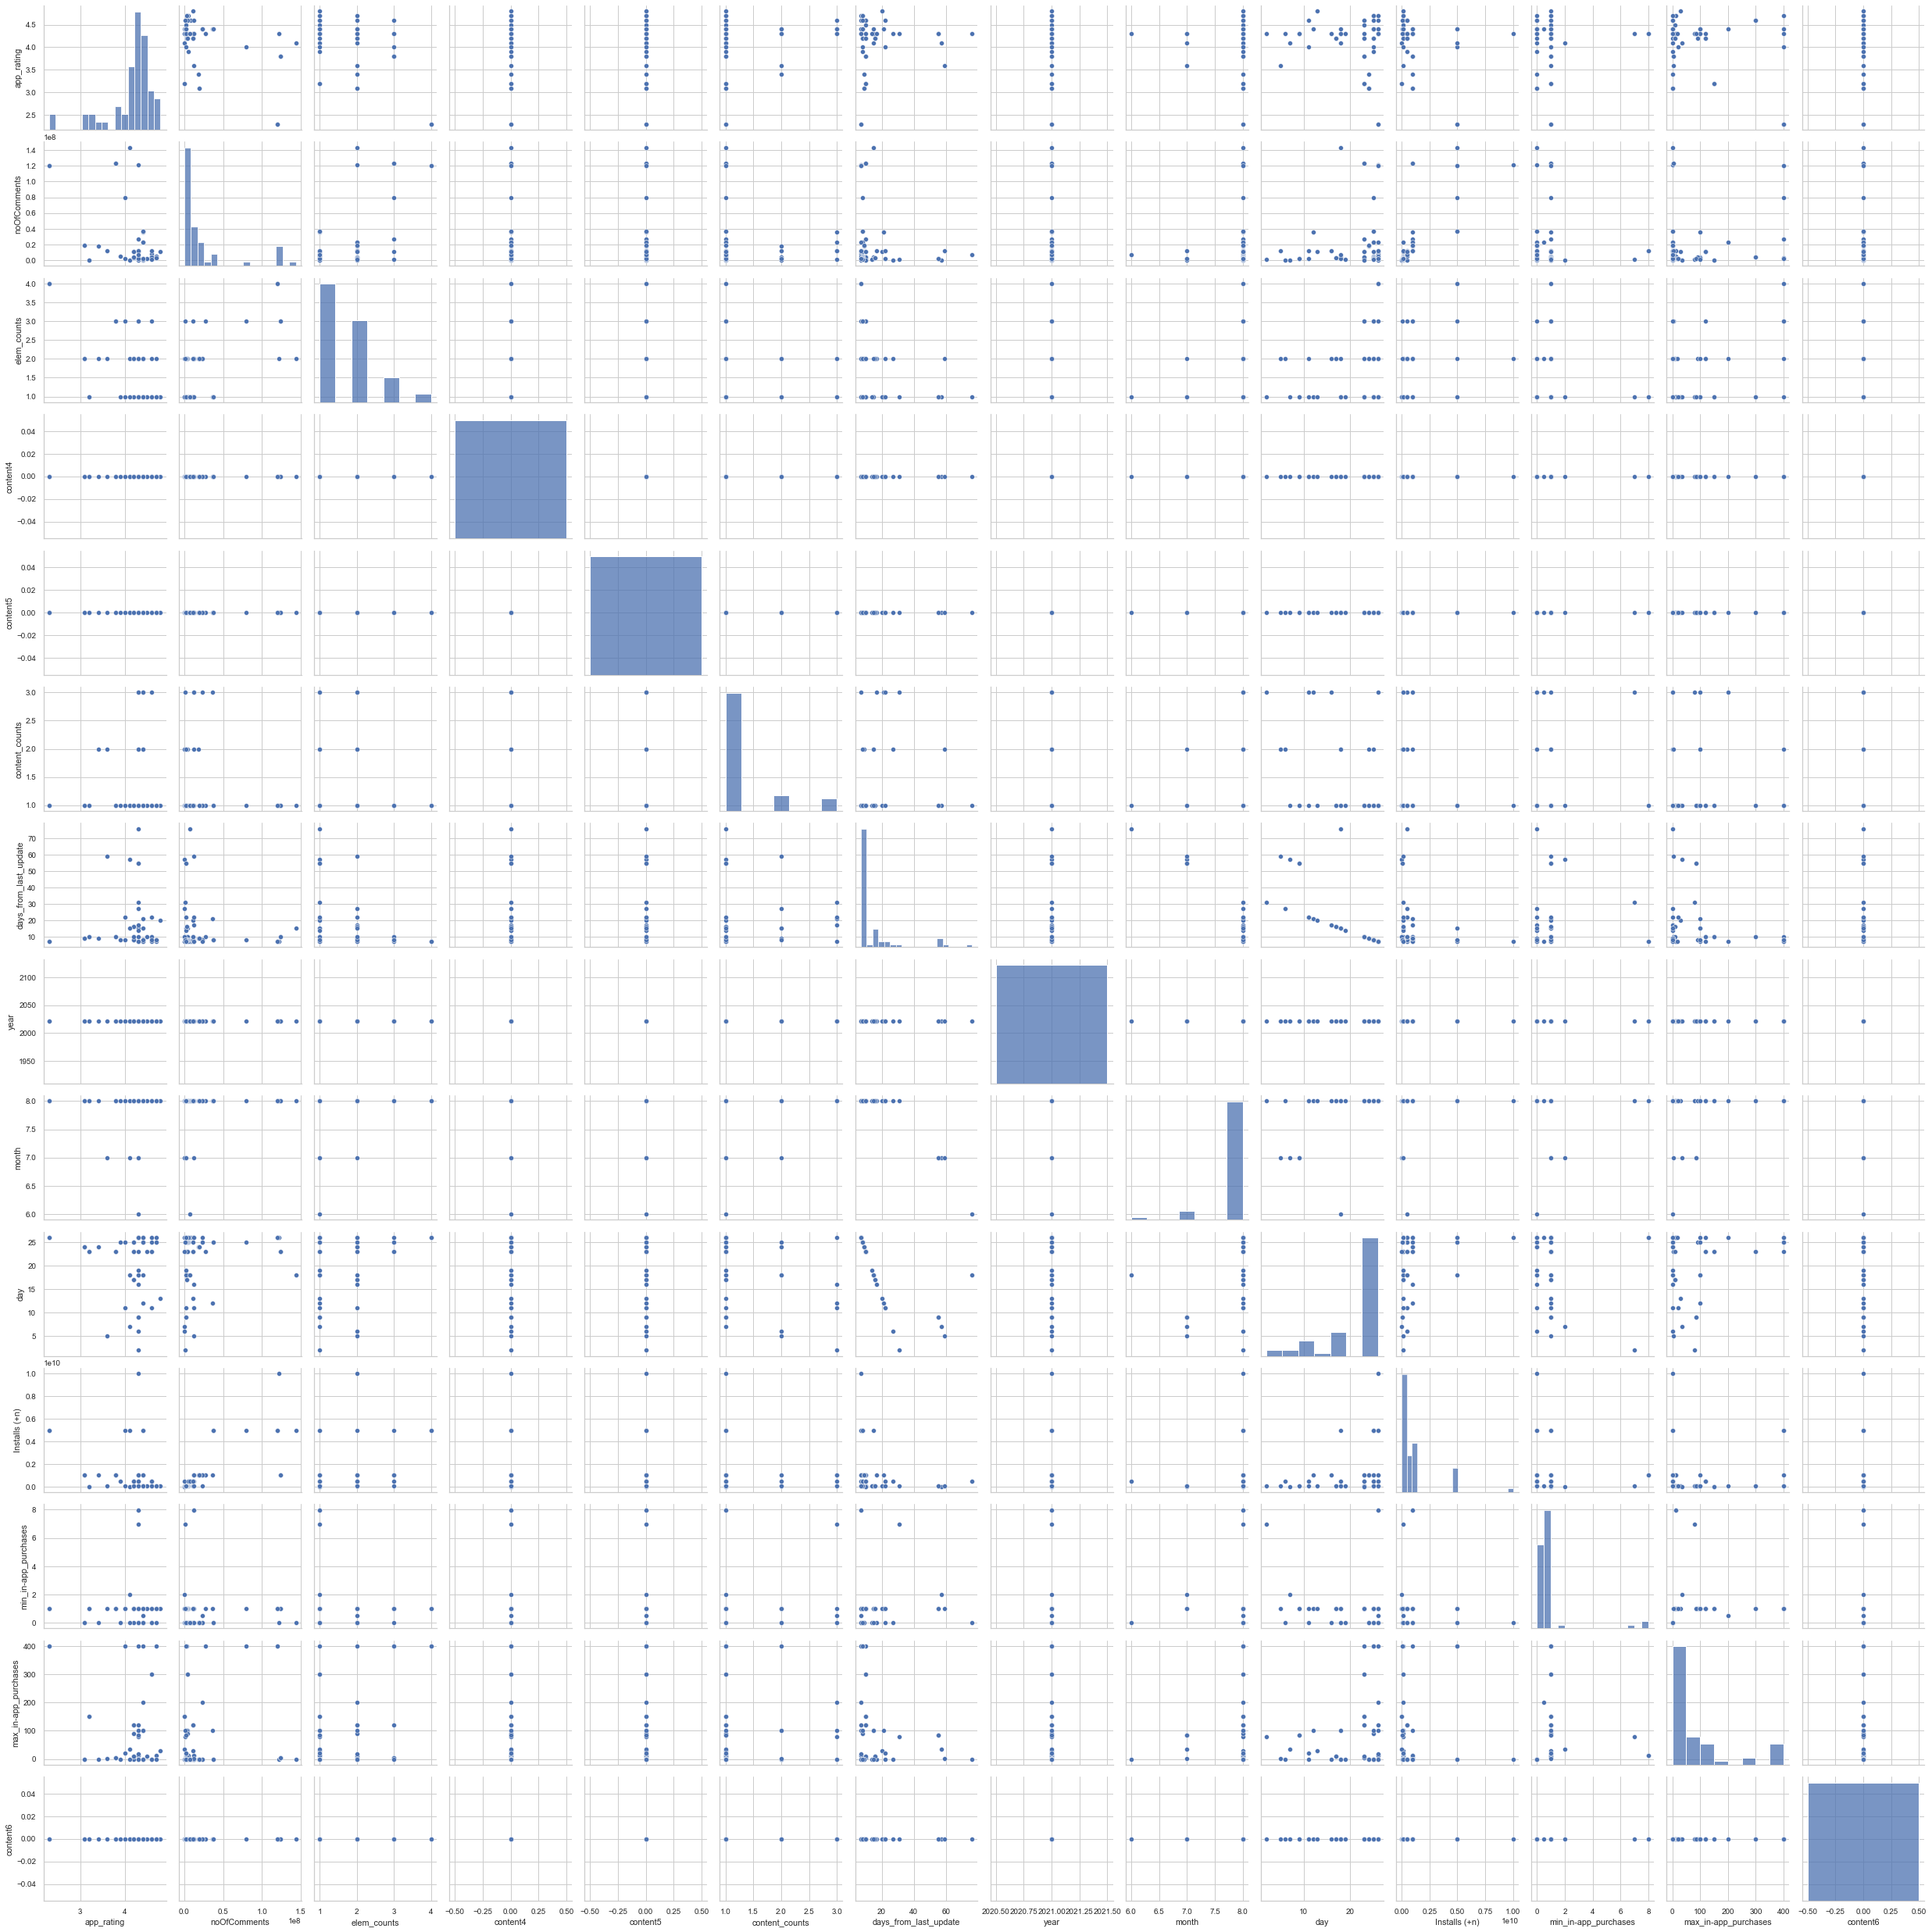

In [57]:
sns.pairplot(df)

<AxesSubplot:>

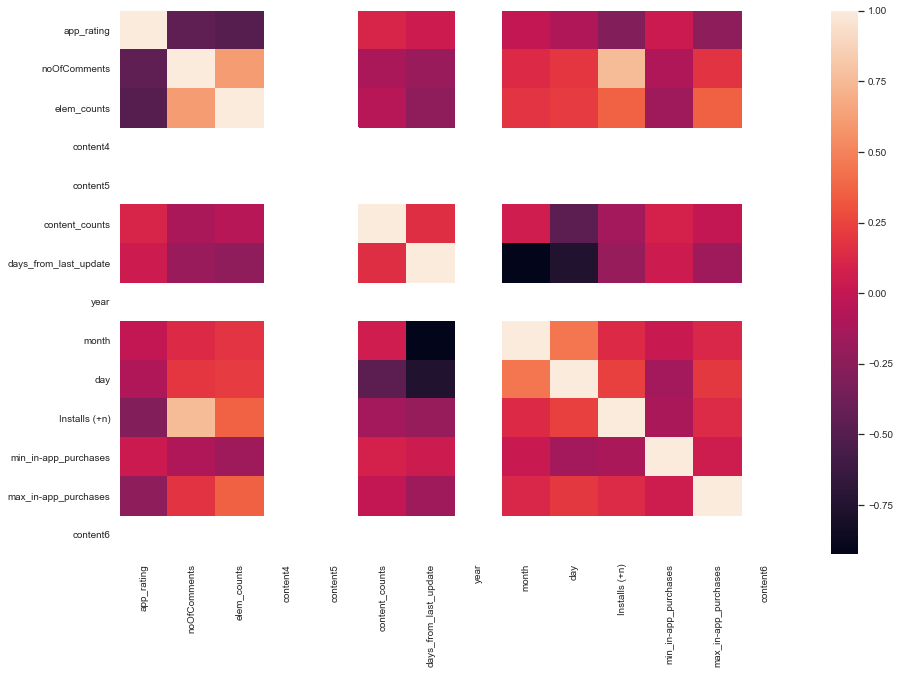

In [58]:
sns.heatmap(df.corr())

# Step 3: Data Preprocessing:
## a) Feature Engineering:

In [9]:
df['InterActive_Elem'].unique()

array(['Users Interact, Digital Purchases', 'In-Game Purchases', 0,
       'Users Interact, Shares Info, Shares Location',
       'Digital Purchases',
       'Users Interact, Shares Info, Shares Location, Digital Purchases',
       'Users Interact, Shares Info',
       'Users Interact, Shares Info, Digital Purchases', 'Users Interact',
       'Users Interact, Shares Location, In-App Purchases',
       'In-App Purchases', 'Shares Info, Digital Purchases',
       'Users Interact, Shares Location',
       'Users Interact, In-App Purchases',
       'Users Interact, In-Game Purchases'], dtype=object)

In [10]:
pairs = []
for elem in df['InterActive_Elem']:
    if elem !=0:
        pair = elem.split(', ')
        pairs.append(pair)
    else:
        pairs.append([0])
df['InterActive_Elem'] = pairs
pairs

[['Users Interact', 'Digital Purchases'],
 ['In-Game Purchases'],
 [0],
 ['Users Interact', 'Shares Info', 'Shares Location'],
 ['Digital Purchases'],
 ['Users Interact', 'Shares Info', 'Shares Location', 'Digital Purchases'],
 [0],
 ['Users Interact', 'Shares Info'],
 [0],
 ['In-Game Purchases'],
 ['Users Interact', 'Shares Info', 'Digital Purchases'],
 ['Users Interact'],
 ['Users Interact', 'Shares Location', 'In-App Purchases'],
 ['Users Interact'],
 ['Users Interact', 'Shares Info', 'Shares Location'],
 [0],
 ['Users Interact'],
 ['In-App Purchases'],
 [0],
 [0],
 ['Users Interact', 'Shares Info'],
 [0],
 ['Digital Purchases'],
 ['Users Interact'],
 ['Users Interact', 'Digital Purchases'],
 ['Shares Info', 'Digital Purchases'],
 ['Users Interact'],
 ['Digital Purchases'],
 ['Users Interact'],
 [0],
 ['Users Interact', 'Shares Location'],
 ['Users Interact', 'Shares Location', 'In-App Purchases'],
 ['Shares Info', 'Digital Purchases'],
 ['Users Interact', 'Digital Purchases'],
 ['U

In [11]:
elem1 = []
elem2 = []
elem3 = []
elem4 = []

for elem in df['InterActive_Elem']:
    if len(elem)==1:
        elem1.append(elem[0])
        elem2.append(0)
        elem3.append(0)
        elem4.append(0)
    elif len(elem)==2:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(0)
        elem4.append(0)
    elif len(elem)==3:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(0)
    elif len(elem)==4:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(elem[3])

df['Interactive_elem1']=elem1
df['Interactive_elem2']=elem2
df['Interactive_elem3']=elem3
df['Interactive_elem4']=elem4

elem_counts = []
for i in df['InterActive_Elem']:
    elem_counts.append(len(i))
df['elem_counts']=elem_counts
df.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,latest_Update,size,...,android_Version_Supported,InterActive_Elem,content_Rating,Report,In-app_Purchases,Interactive_elem1,Interactive_elem2,Interactive_elem3,Interactive_elem4,elem_counts
0,YouTube,Google LLC,4.3,Recommended for you,0,Video Players & Editors,121306065,1,"August 26, 2021",Varies with device,...,Varies with device,"[Users Interact, Digital Purchases]",TeenLearn more,Flag as inappropriate,0 - 0,Users Interact,Digital Purchases,0,0,2
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0,Arcade,36209360,1,"August 12, 2021",174M,...,4.4 and up,[In-Game Purchases],Everyone 10+Fantasy ViolenceLearn more,Flag as inappropriate,$0.99 - $99.99 per item,In-Game Purchases,0,0,0,1
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0,Entertainment,11979087,1,"August 26, 2021",Varies with device,...,Varies with device,[0],TeenLearn more,Flag as inappropriate,$7.99 - $13.99 per item,0,0,0,0,1
3,Instagram,Instagram,3.8,Recommended for you,0,Social,123499183,1,"August 23, 2021",Varies with device,...,Varies with device,"[Users Interact, Shares Info, Shares Location]",TeenLearn more,Flag as inappropriate,$0.99 - $4.99 per item,Users Interact,Shares Info,Shares Location,0,3
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0,Casual,3859794,1,"August 18, 2021",126M,...,5.0 and up,[Digital Purchases],EveryoneComic MischiefLearn more,Flag as inappropriate,$0.99 - $99.99 per item,Digital Purchases,0,0,0,1


In [12]:
df['content_Rating'].unique()

array(['TeenLearn more', 'Everyone 10+Fantasy ViolenceLearn more',
       'EveryoneComic MischiefLearn more', 'EveryoneLearn more',
       'TeenDiverse Content: Discretion AdvisedLearn more',
       'Mature 17+Learn more',
       'Everyone 10+Fantasy Violence, Mild BloodLearn more'], dtype=object)

In [13]:
con = []
for content in df['content_Rating']:
    pair = content.strip('Learn more')
    if ', ' in pair:
        pair = pair.split(', ')
    else:
        pair = pair.split(' ')
    if 'Content:' in pair:
        pair.remove('Content:')
    con.append(pair)
df['content_Rating'] = con

In [14]:
elem1 = []
elem2 = []
elem3 = []
elem4 = []
elem5 = []

for elem in df['content_Rating']:
    if len(elem)==1:
        elem1.append(elem[0])
        elem2.append(0)
        elem3.append(0)
        elem4.append(0)
        elem5.append(0)
    elif len(elem)==2:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(0)
        elem4.append(0)
        elem5.append(0)
    elif len(elem)==3:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(0)
        elem5.append(0)
    elif len(elem)==4:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(elem[3])
        elem5.append(0)
    elif len(elem)==5:
        elem1.append(elem[0])
        elem2.append(elem[1])
        elem3.append(elem[2])
        elem4.append(elem[3])
        elem5.append(elem[4])

df['content1']=elem1
df['content2']=elem2
df['content3']=elem3
df['content4']=elem4
df['content5']=elem5

elem_counts = []
for i in df['content_Rating']:
    elem_counts.append(len(i))
df['content_counts']=elem_counts
df.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,latest_Update,size,...,Interactive_elem2,Interactive_elem3,Interactive_elem4,elem_counts,content1,content2,content3,content4,content5,content_counts
0,YouTube,Google LLC,4.3,Recommended for you,0,Video Players & Editors,121306065,1,"August 26, 2021",Varies with device,...,Digital Purchases,0,0,2,T,0,0,0,0,1
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0,Arcade,36209360,1,"August 12, 2021",174M,...,0,0,0,1,Everyone,10+Fantasy,Violenc,0,0,3
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0,Entertainment,11979087,1,"August 26, 2021",Varies with device,...,0,0,0,1,T,0,0,0,0,1
3,Instagram,Instagram,3.8,Recommended for you,0,Social,123499183,1,"August 23, 2021",Varies with device,...,Shares Info,Shares Location,0,3,T,0,0,0,0,1
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0,Casual,3859794,1,"August 18, 2021",126M,...,0,0,0,1,EveryoneComic,Mischief,0,0,0,2


In [15]:
current_date = dt.datetime.now()
df['latest_Update'] = pd.to_datetime(df['latest_Update'])
df['days_from_last_update'] = current_date.date()- df['latest_Update'].dt.date
days = []
for t in df['days_from_last_update']:
    days.append(t.days)

df['days_from_last_update']=days

In [16]:
df['year'] = df['latest_Update'].dt.year
df['month'] = df['latest_Update'].dt.month
df['day'] = df['latest_Update'].dt.day

In [17]:
res = []
for i in df['Installs']:
    r = ''.join(i.strip('+').split(','))
    res.append(int(r))
df['Installs (+n)'] = res
df = df.drop('Installs', axis=1)
df.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,latest_Update,size,...,content2,content3,content4,content5,content_counts,days_from_last_update,year,month,day,Installs (+n)
0,YouTube,Google LLC,4.3,Recommended for you,0,Video Players & Editors,121306065,1,2021-08-26,Varies with device,...,0,0,0,0,1,14,2021,8,26,10000000000
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0,Arcade,36209360,1,2021-08-12,174M,...,10+Fantasy,Violenc,0,0,3,28,2021,8,12,1000000000
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0,Entertainment,11979087,1,2021-08-26,Varies with device,...,0,0,0,0,1,14,2021,8,26,1000000000
3,Instagram,Instagram,3.8,Recommended for you,0,Social,123499183,1,2021-08-23,Varies with device,...,0,0,0,0,1,17,2021,8,23,1000000000
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0,Casual,3859794,1,2021-08-18,126M,...,Mischief,0,0,0,2,22,2021,8,18,100000000


In [18]:
Min = []
Max = []
for i in df['In-app_Purchases']:
    if ',' in i:
        i = ''.join(i.split(','))
    Min.append(float(i.split(' ')[0].strip('$')))
    try:
        Max.append(float(i.split(' ')[2].strip('$')))
    except Exception:
        Max.append(float(i.split(' ')[0].strip('$')))

df['min_in-app_purchases'] = Min
df['max_in-app_purchases'] = Max

df.head()

,app_name,app_company,app_rating,underTitle,app_price,gener,noOfComments,page_index,latest_Update,size,...,content4,content5,content_counts,days_from_last_update,year,month,day,Installs (+n),min_in-app_purchases,max_in-app_purchases
0,YouTube,Google LLC,4.3,Recommended for you,0,Video Players & Editors,121306065,1,2021-08-26,Varies with device,...,0,0,1,14,2021,8,26,10000000000,0.00,0.00
1,Subway Surfers,SYBO Games,4.4,Recommended for you,0,Arcade,36209360,1,2021-08-12,174M,...,0,0,3,28,2021,8,12,1000000000,0.99,99.99
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,0,Entertainment,11979087,1,2021-08-26,Varies with device,...,0,0,1,14,2021,8,26,1000000000,7.99,13.99
3,Instagram,Instagram,3.8,Recommended for you,0,Social,123499183,1,2021-08-23,Varies with device,...,0,0,1,17,2021,8,23,1000000000,0.99,4.99
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,0,Casual,3859794,1,2021-08-18,126M,...,0,0,2,22,2021,8,18,100000000,0.99,99.99


## b) Feature transformations/ Data Cleaning:
### -1- working with missing data:

In [7]:
df['InterActive_Elem'] = df['InterActive_Elem'].fillna(0)

In [8]:
df['In-app_Purchases'] = df['In-app_Purchases'].fillna('0 - 0')

### -2- drop the redundant data columns:

In [19]:
df['Report'].unique() # all apps have reporting to being inappropriate
# so we just have to dropout this column
df = df.drop(['Report','page_index','In-app_Purchases','content_Rating','InterActive_Elem'], axis=1)

In [20]:
df = df.drop('latest_Update', axis=1)

- app_price contain all 0 which indicates that the scrapped applications were either not scrapped correctly or that the games in the home page and the see more pages where free games in all cese app_price column is to be deleted

In [21]:
df = df.drop('app_price', axis=1)
df.head()

,app_name,app_company,app_rating,underTitle,gener,noOfComments,size,android_Version_Supported,Interactive_elem1,Interactive_elem2,...,content4,content5,content_counts,days_from_last_update,year,month,day,Installs (+n),min_in-app_purchases,max_in-app_purchases
0,YouTube,Google LLC,4.3,Recommended for you,Video Players & Editors,121306065,Varies with device,Varies with device,Users Interact,Digital Purchases,...,0,0,1,14,2021,8,26,10000000000,0.00,0.00
1,Subway Surfers,SYBO Games,4.4,Recommended for you,Arcade,36209360,174M,4.4 and up,In-Game Purchases,0,...,0,0,3,28,2021,8,12,1000000000,0.99,99.99
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,Entertainment,11979087,Varies with device,Varies with device,0,0,...,0,0,1,14,2021,8,26,1000000000,7.99,13.99
3,Instagram,Instagram,3.8,Recommended for you,Social,123499183,Varies with device,Varies with device,Users Interact,Shares Info,...,0,0,1,17,2021,8,23,1000000000,0.99,4.99
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,Casual,3859794,126M,5.0 and up,Digital Purchases,0,...,0,0,2,22,2021,8,18,100000000,0.99,99.99


# step 4: data analysis and creating insights: for the best combination of features for applications with highest installs

## 1 - the developing company for the app and its relationships with other app properties:

- **1-a) There isn't a definite relationship between company and number of installs since the majority of companies are not repetitive infact large companies as google, instagram, facebook, amazon and others are not those of the highest number of installations** 


- **1-b) but for the relationship between the company and the number of comments we see that most popular app companies as facebook, google, instagram, what'sapp dominate in the number of comments - maybe these companies gained the largest commenting numbers because of the repititive scandals associated with these companies**


- **1-c) again for the rating and the company the rating is very low for the famous companies as google and facebook but on the otherhand it is high for apps as amazon, soundcloud and other companies that are not having the same popularity**



D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


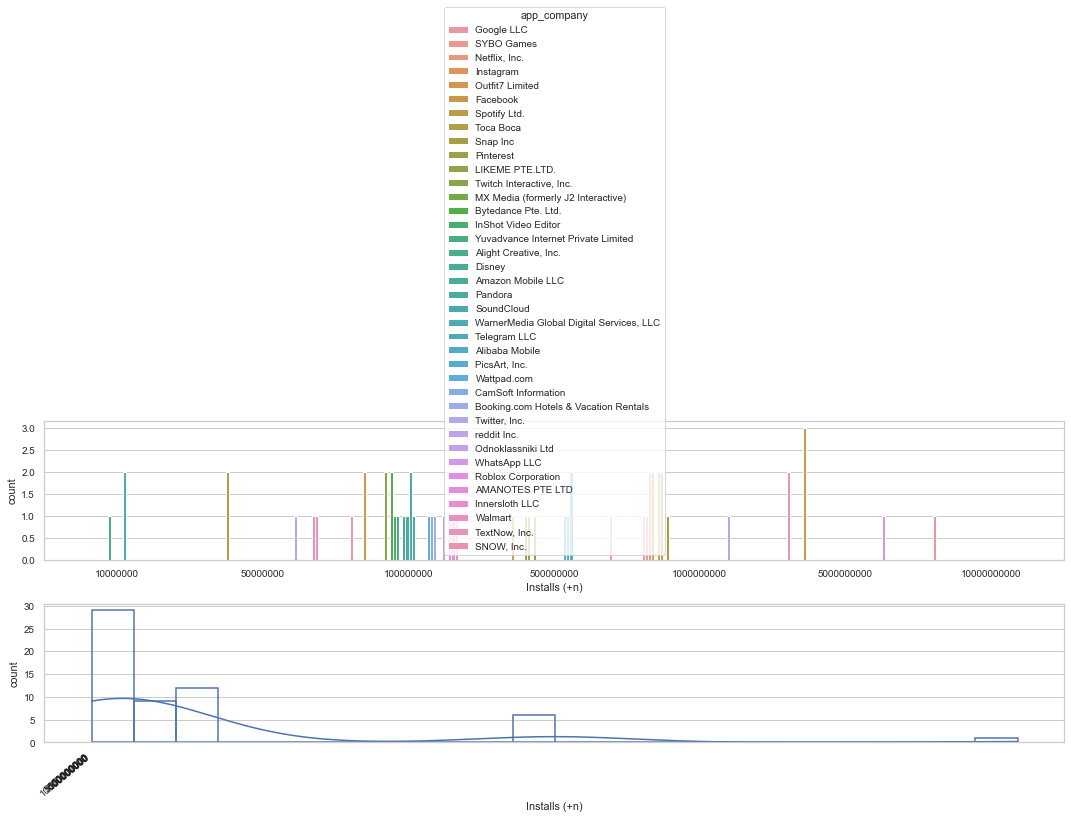

In [59]:
plt.subplot(2,1,1)
sns.countplot(df['Installs (+n)'], hue= df['app_company'])
plt.subplot(2,1,2)
ax = sns.countplot(df['Installs (+n)'])
sns.histplot(df['Installs (+n)'], kde=True, fill=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Installs (+n)', ylabel='app_company'>

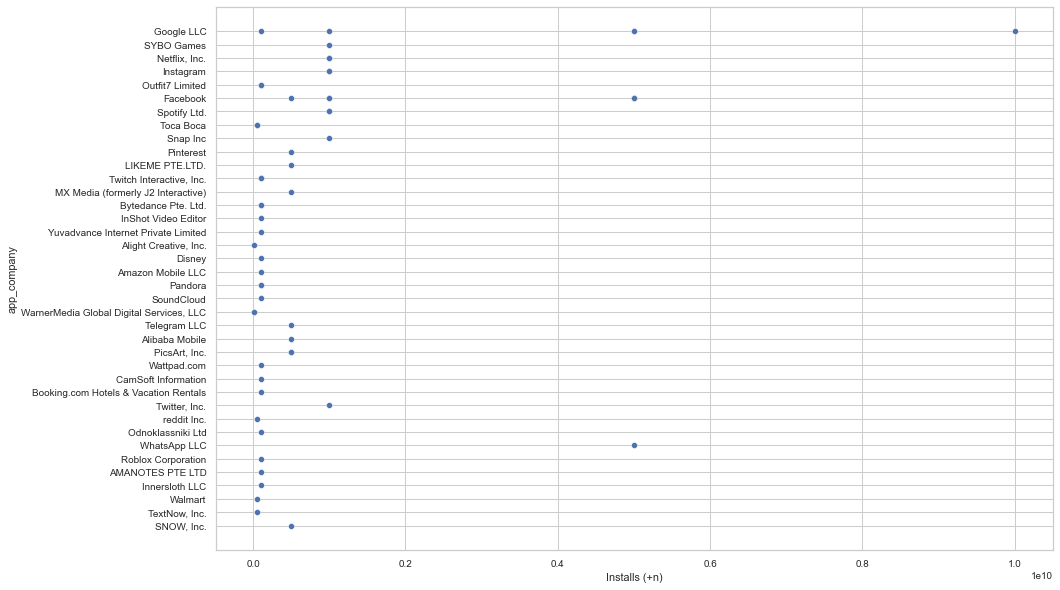

In [28]:
sns.scatterplot(df['Installs (+n)'], df['app_company'])

<AxesSubplot:xlabel='noOfComments', ylabel='app_company'>

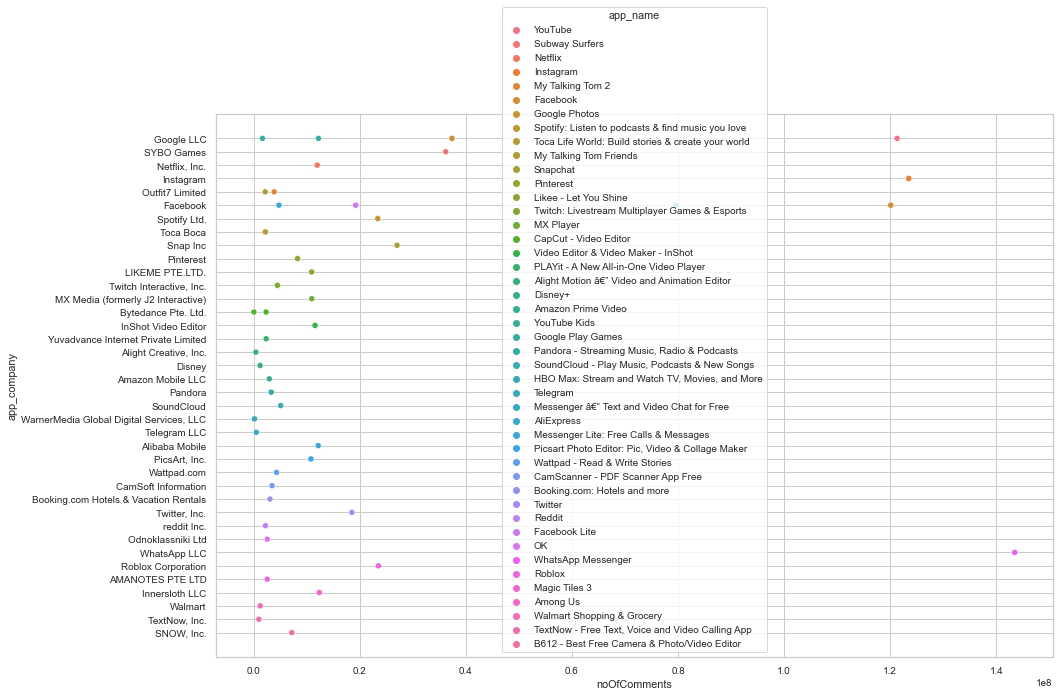

In [29]:
sns.scatterplot(data = df, x='noOfComments', y='app_company', hue='app_name')

**I noticed from the above graph that there is some sort of repetition in the applications it self as facebook is repeated twice, Facebook lite too** this must be corrected

In [31]:
names = df['app_name'].unique()
avg_installs = []
avg_comments = []
avg_rating = []
avg_month = []
avg_day = []
for name in df['app_name']:
    avg_installs.append(df[df['app_name']==name]['Installs (+n)'].mean())
    avg_comments.append(df[df['app_name']==name]['noOfComments'].mean())
    avg_rating.append(df[df['app_name']==name]['app_rating'].mean())
    avg_month.append(df[df['app_name']==name]['month'].mean())
    avg_day.append(df[df['app_name']==name]['day'].mean())

df['Installs (+n)'] = avg_installs
df['noOfComments'] = avg_comments
df['app_rating'] = avg_rating
df['month'] = avg_month
df['day'] = avg_day

In [56]:
df2 = df
for name in names:
    index = df2[df2['app_name']==name].index
    if len(index)>1:
        print(index)
        for i in range(1,len(index)):
            print(index[i])
            df2 = df2.drop(index[i])

Int64Index([2, 29], dtype='int64')
29
Int64Index([3, 14], dtype='int64')
14
Int64Index([5, 39], dtype='int64')
39
Int64Index([6, 54], dtype='int64')
54
Int64Index([7, 20], dtype='int64')
20
Int64Index([8, 46], dtype='int64')
46
Int64Index([13, 28], dtype='int64')
28
Int64Index([16, 53], dtype='int64')
53
Int64Index([25, 32], dtype='int64')
32
Int64Index([27, 48], dtype='int64')
48
Int64Index([35, 56], dtype='int64')
56
Int64Index([42, 51], dtype='int64')
51


In [57]:
df2[df2['app_name']=='Facebook'].index

Int64Index([5], dtype='int64')

**Repeate the plotting after removing the redundant data**

<AxesSubplot:xlabel='noOfComments', ylabel='app_company'>

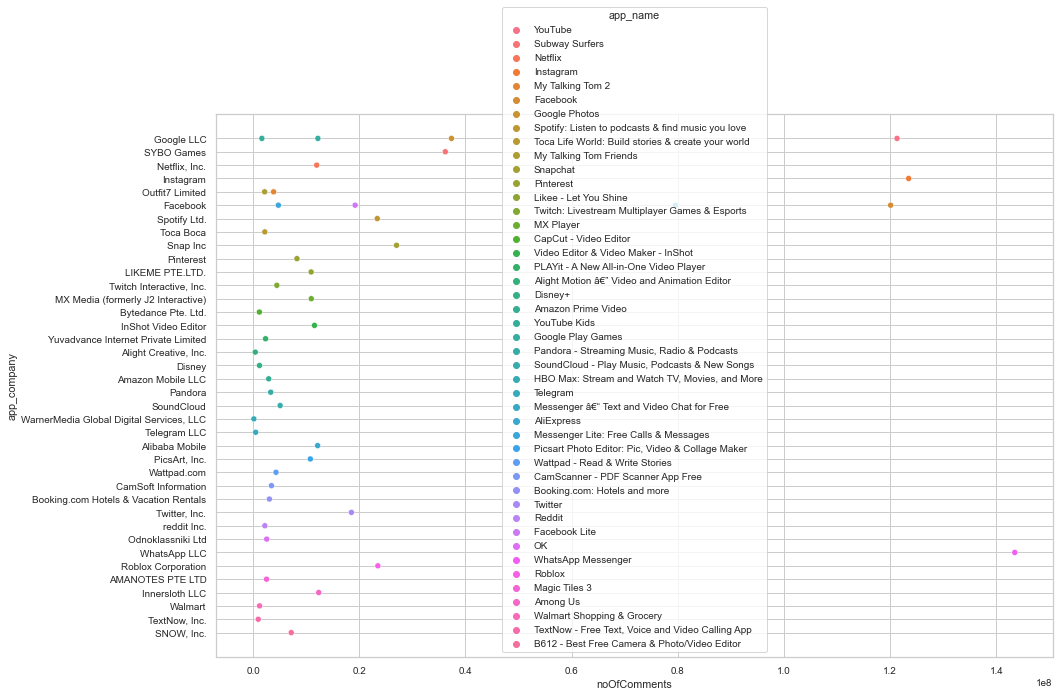

In [58]:
sns.scatterplot(data = df2, x='noOfComments', y='app_company', hue='app_name')

<AxesSubplot:xlabel='app_rating', ylabel='app_company'>

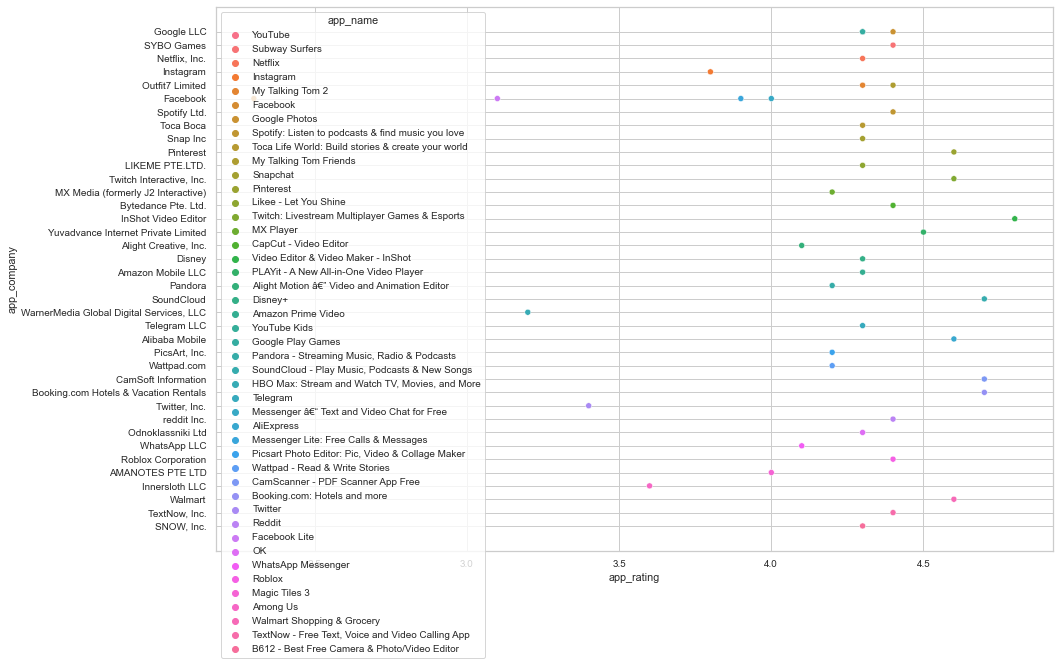

In [59]:
sns.scatterplot(data = df2, x='app_rating', y='app_company', hue='app_name')

<AxesSubplot:xlabel='Installs (+n)', ylabel='app_rating'>

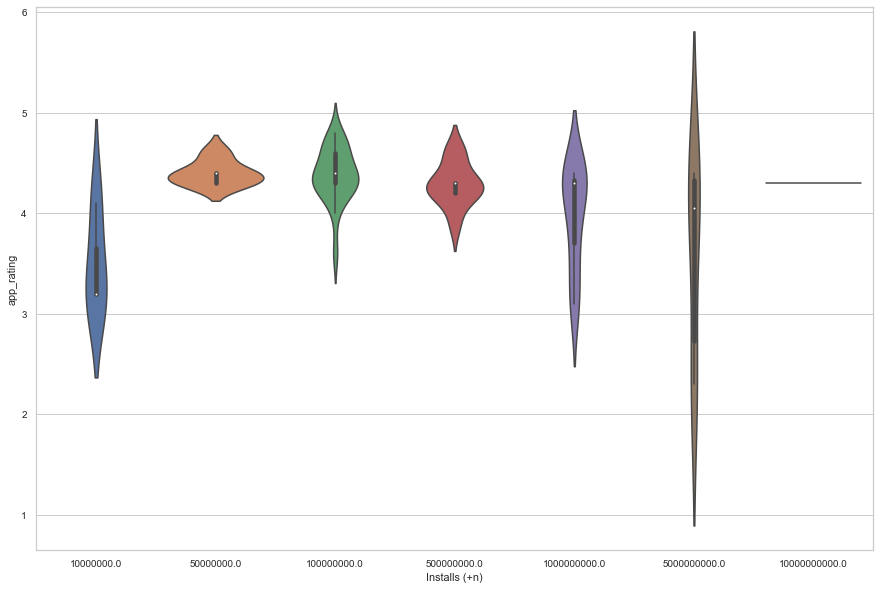

In [60]:
sns.violinplot(data=df, x='Installs (+n)', y='app_rating')

- **5-a)for the relationship between the number of comments and the number of installs**: We can see that there really exists a direct relationship between those 2 categories

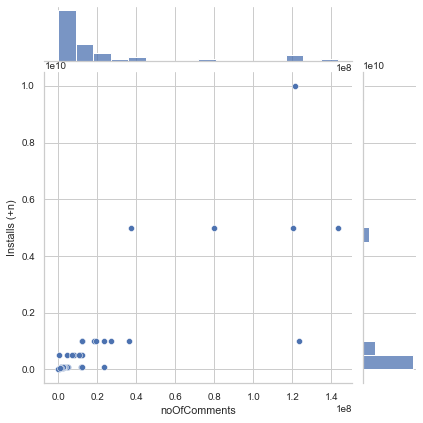

In [61]:
sns.jointplot(data = df2, x="noOfComments", y='Installs (+n)')

## 2- title relationships with number of installs:

- **2-a) so the titles: Recommended for you, Entertainment, Editor's Choice apps, Popular apps& games: contain the highest number of applications**

- **2-b) the number of installs in Recommended for you has very high number of installs as well as take better photos section**

- **2-c) when the app is recommended repeatedly under different titles most probably will have higher chance to be installed**

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


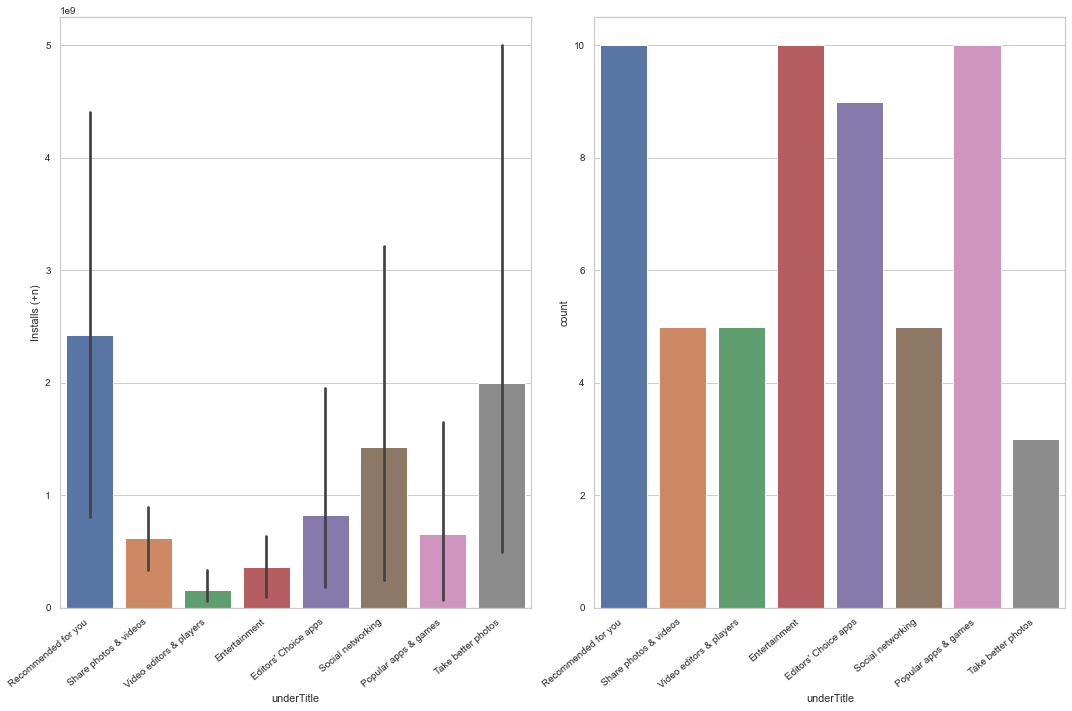

In [62]:
plt.subplot(1,2,1)
ax = sns.barplot(data=df, x='underTitle', y='Installs (+n)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()


plt.subplot(1,2,2)
ax2 = sns.countplot(df['underTitle'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [63]:
# get only repeated applications
rep = []
for n in names:
    res = df[df['app_name']==n].index
    if len(res)>1:
        for i in res:
            rep.append(i)
            
df_rep = pd.DataFrame()
for i in range(len(rep)):
    df_rep = df_rep.append(df.iloc[rep[i]])  
df_rep.head()

repeated = []
for i in range(len(df)):
    if i+1 in rep:
        repeated.append(1)
    else:
        repeated.append(0)

df['repeated_under_titles'] = repeated
df.head()

,app_name,app_company,app_rating,underTitle,gener,noOfComments,size,android_Version_Supported,Interactive_elem1,Interactive_elem2,...,content5,content_counts,days_from_last_update,year,month,day,Installs (+n),min_in-app_purchases,max_in-app_purchases,repeated_under_titles
0,YouTube,Google LLC,4.3,Recommended for you,Video Players & Editors,121306065.0,Varies with device,Varies with device,Users Interact,Digital Purchases,...,0,1,6,2021,8.0,26.0,1.000000e+10,0.00,0.00,0
1,Subway Surfers,SYBO Games,4.4,Recommended for you,Arcade,36209360.0,174M,4.4 and up,In-Game Purchases,0,...,0,3,20,2021,8.0,12.0,1.000000e+09,0.99,99.99,1
2,Netflix,"Netflix, Inc.",4.3,Recommended for you,Entertainment,11979092.5,Varies with device,Varies with device,0,0,...,0,1,6,2021,8.0,26.0,1.000000e+09,7.99,13.99,1
3,Instagram,Instagram,3.8,Recommended for you,Social,123499418.0,Varies with device,Varies with device,Users Interact,Shares Info,...,0,1,9,2021,8.0,23.0,1.000000e+09,0.99,4.99,0
4,My Talking Tom 2,Outfit7 Limited,4.3,Recommended for you,Casual,3859794.0,126M,5.0 and up,Digital Purchases,0,...,0,2,14,2021,8.0,18.0,1.000000e+08,0.99,99.99,1


<AxesSubplot:xlabel='underTitle', ylabel='Installs (+n)'>

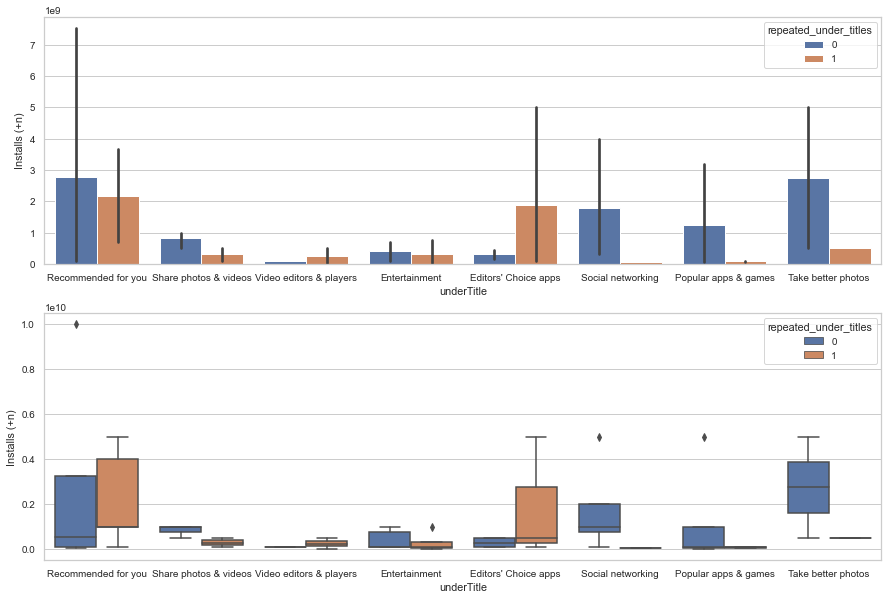

In [64]:
plt.subplot(2,1,1)
sns.barplot(data=df, x='underTitle', y='Installs (+n)', hue='repeated_under_titles')
plt.subplot(2,1,2)
sns.boxplot(data=df, x='underTitle', y='Installs (+n)', hue='repeated_under_titles')

## 3- Relationship of app genre and other features of the application:

- **3-a)the communication genre is the genre having both highest number of installs and highest number of comments too, but on the other hand the social genre has the highest number of comments although this category has low number of installs, photography category is the exact opposite for the social genre**

- 3-b) *answered with 3-a*


D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


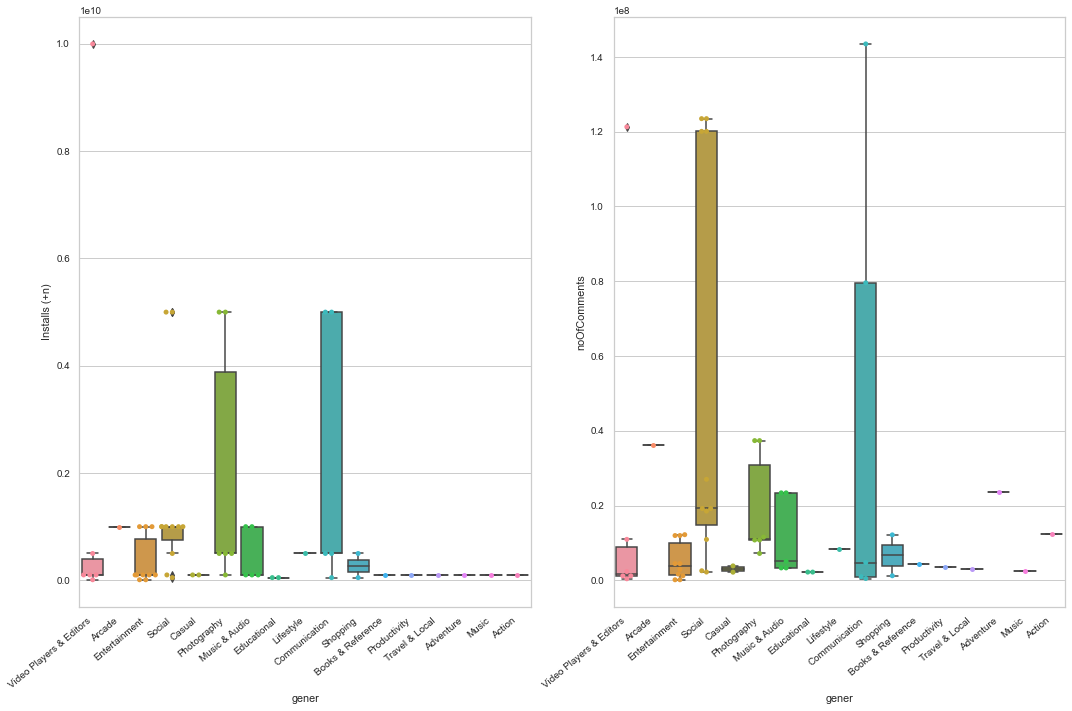

In [65]:
plt.subplot(1,2,1)
ax = sns.swarmplot(data=df, x='gener', y='Installs (+n)')
sns.boxplot(data=df, x='gener', y='Installs (+n)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.subplot(1,2,2)
ax = sns.swarmplot(data=df, x='gener', y='noOfComments')
sns.boxplot(data=df, x='gener', y='noOfComments')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

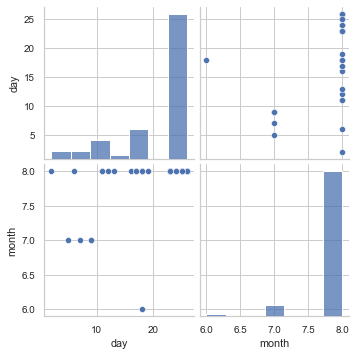

In [66]:
sns.pairplot(df[['gener', 'day', 'month']]) # this feature doesn't apply the requirements of this question

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: 

<AxesSubplot:xlabel='days_from_last_update', ylabel='gener'>

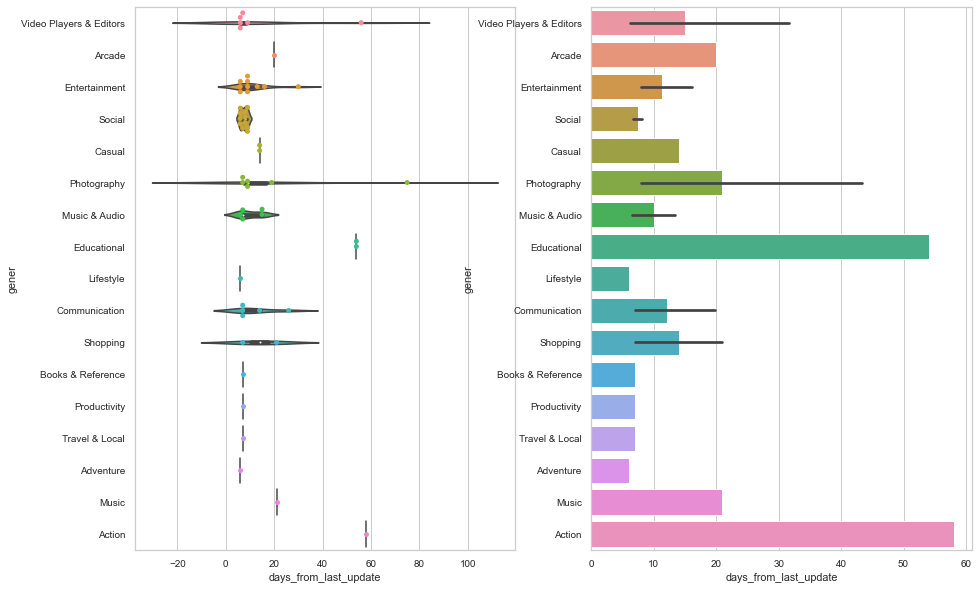

In [67]:
plt.subplot(1,2,1)
sns.violinplot(df['days_from_last_update'], df['gener'])
sns.swarmplot(df['days_from_last_update'], df['gener'])
plt.subplot(1,2,2)
sns.barplot(df['days_from_last_update'], df['gener'])

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='days_from_last_update', ylabel='gener'>

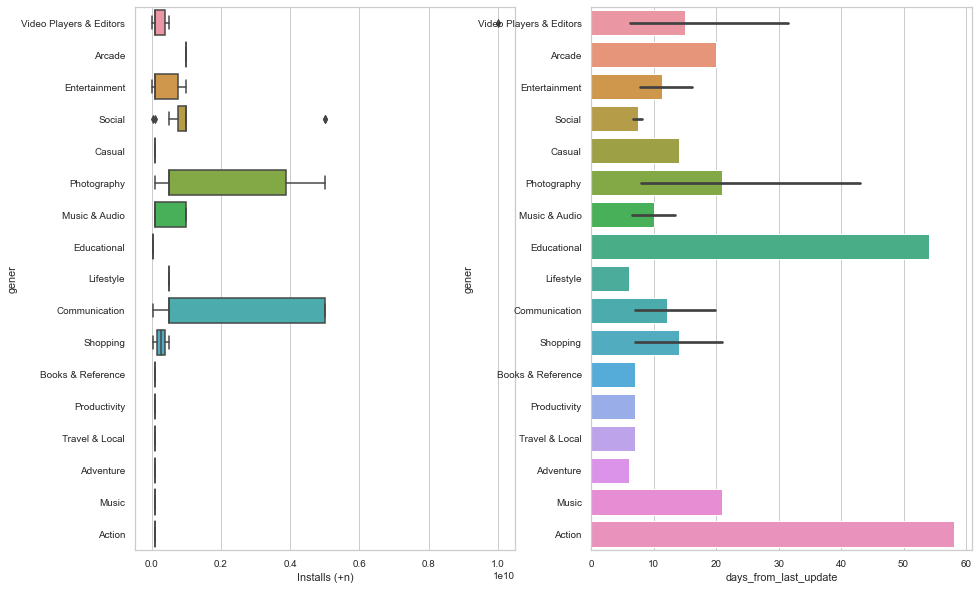

In [68]:
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Installs (+n)', y='gener')
plt.subplot(1,2,2)
sns.barplot(df['days_from_last_update'], df['gener'])

## 4- Relation with the android version supported:
- **3-c)Photography and video players have some applications that haven't been updated lately and others that are updated in the near future - apps related to lifestyle, Books, productivity, travel, and adventure games have the nearest updating date - compared to the number of installs, communication apps although are considered to be updated not so much often it has high number of installs**

- **4.a) the android version of highest installations is the 4.0 and above**

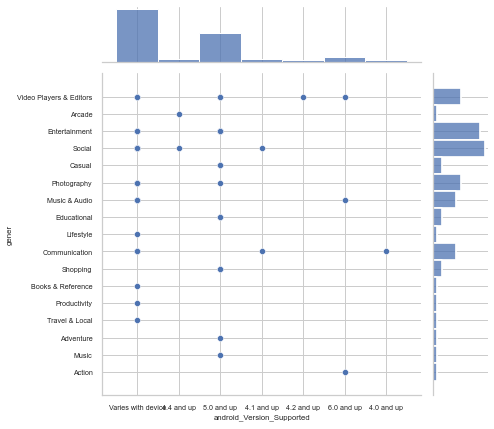

In [69]:
sns.set(rc={'figure.figsize': [15,10]}, font_scale=0.65, style='whitegrid')
sns.jointplot(data=df, x='android_Version_Supported', y='gener')

<AxesSubplot:xlabel='android_Version_Supported', ylabel='Installs (+n)'>

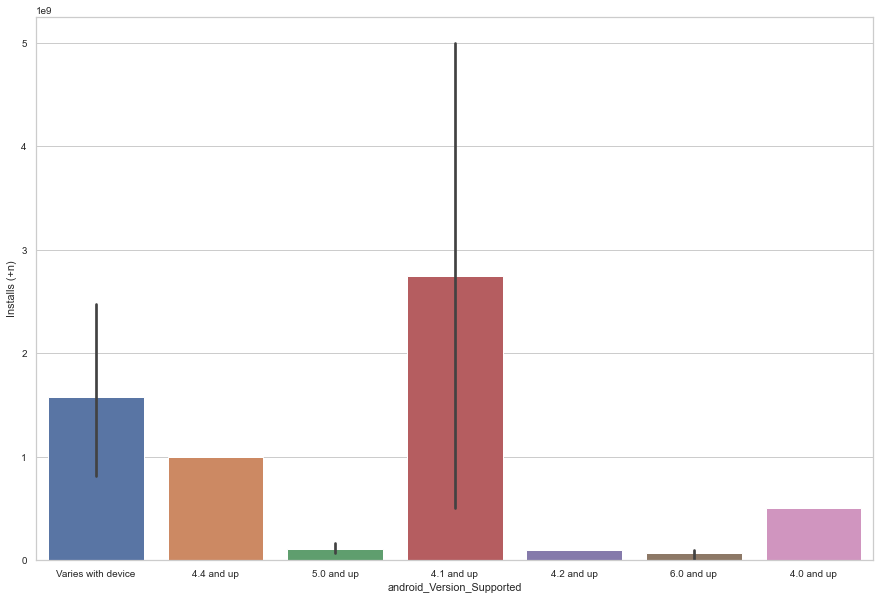

In [70]:
sns.set(rc={'figure.figsize': [15,10]}, font_scale=0.9, style='whitegrid')
sns.barplot(data=df, x='android_Version_Supported', y='Installs (+n)')

## 5- relations of the purchases and interactive elements:

- **5-a) not having purchases isn't a must since some of the apps containing purchases had high installations but what is most common is to have low purchases values**
- **5-b) the strange thing is there only exist some outliers on considering the number of installs and the interactive elements found, however the app of highest instalations has 2 interactive elements and it is under Video Player and Editors gener**
- **5-c) we can see that the application having the highest installs (had 2 elements) had user interacting, Digital purchase interactive elements.** which again proves that purchases wouldn't cause less installations

<AxesSubplot:xlabel='max_in-app_purchases', ylabel='Count'>

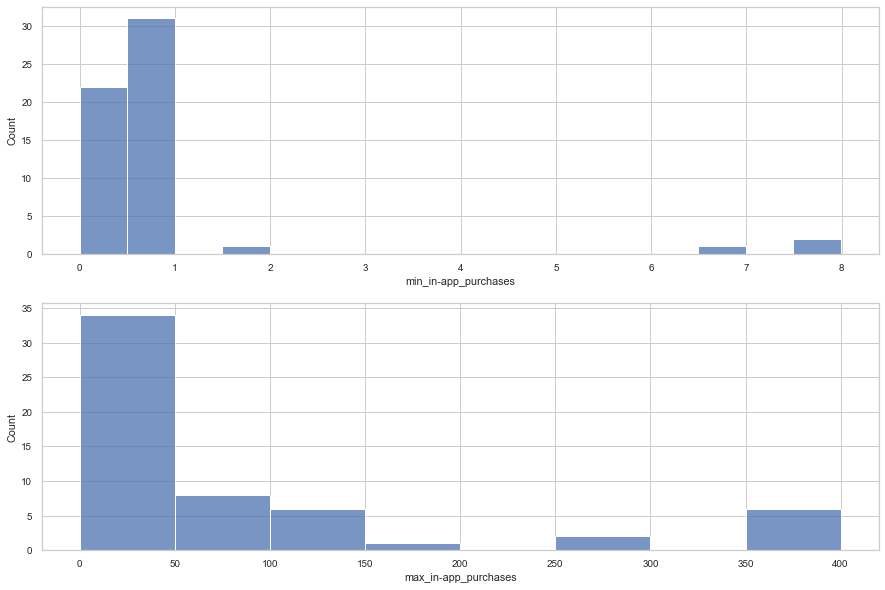

In [71]:
plt.subplot(2,1,1)
sns.histplot(df['min_in-app_purchases'])
plt.subplot(2,1,2)
sns.histplot(df['max_in-app_purchases'])

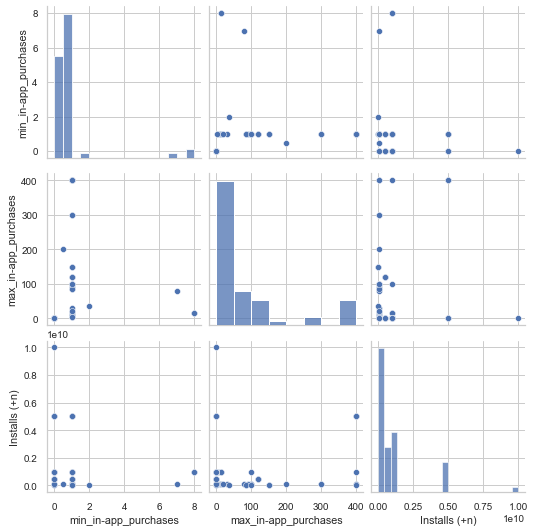

In [72]:
sns.pairplot(df[['min_in-app_purchases', 'max_in-app_purchases', 'Installs (+n)']])


<AxesSubplot:xlabel='elem_counts', ylabel='Installs (+n)'>

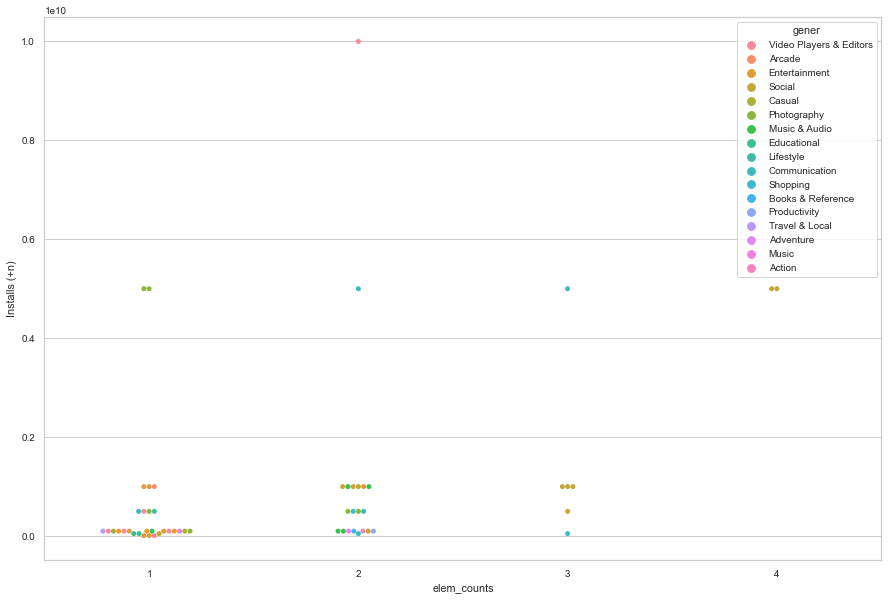

In [73]:
sns.swarmplot(data=df, x='elem_counts', y='Installs (+n)', hue='gener')

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Interactive_elem4', ylabel='Installs (+n)'>

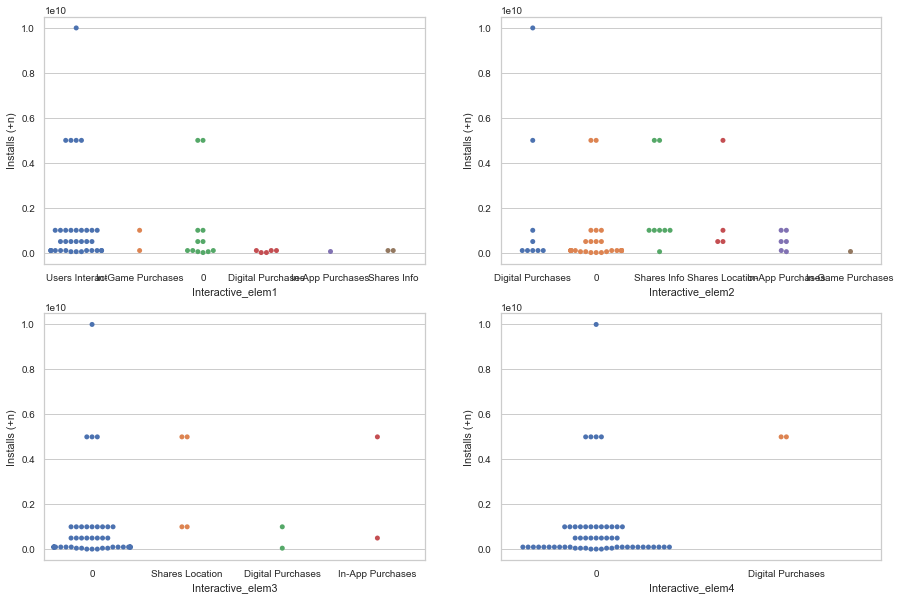

In [74]:
plt.subplot(2,2,1)
sns.swarmplot(data=df, x='Interactive_elem1', y='Installs (+n)')
plt.subplot(2,2,2)
sns.swarmplot(data=df, x='Interactive_elem2', y='Installs (+n)')
plt.subplot(2,2,3)
sns.swarmplot(data=df, x='Interactive_elem3', y='Installs (+n)')
plt.subplot(2,2,4)
sns.swarmplot(data=df, x='Interactive_elem4', y='Installs (+n)')

## 6- Relation with application size:
- **6-a) the application which varies with device is the one with highest number of installs this is because of the generic propertiy of the app size**
- **6-b)so the best combination is: size: varies with device, android version supported:4.2 and up**

<AxesSubplot:xlabel='size', ylabel='Installs (+n)'>

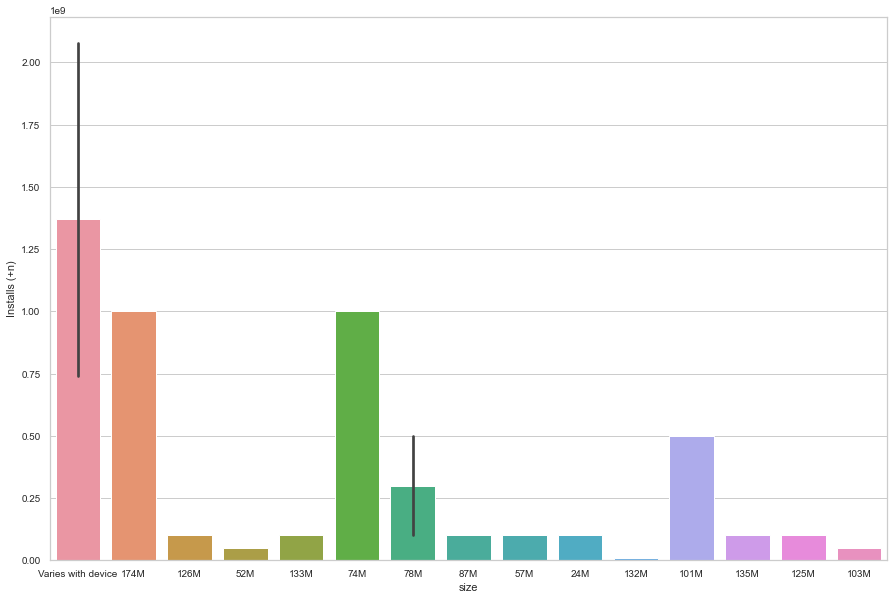

In [75]:
sns.barplot(data=df, x='size', y='Installs (+n)')

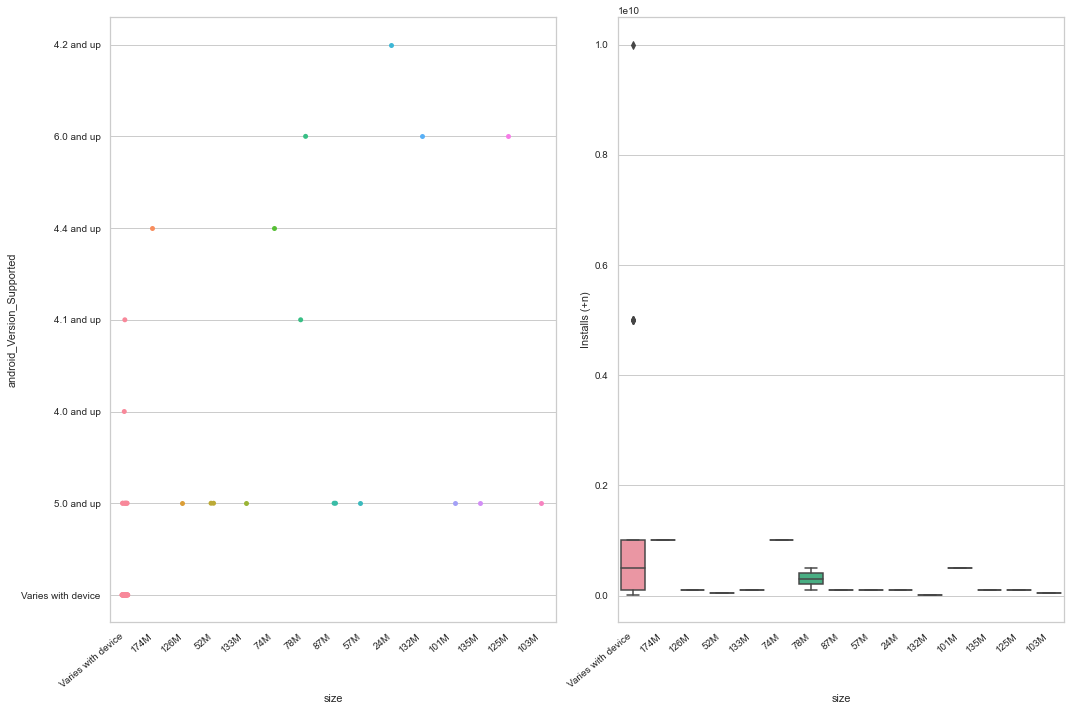

In [76]:
plt.subplot(1,2,1)
ax=sns.stripplot(data=df,y='android_Version_Supported',x= 'size')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.subplot(1,2,2)
ax=sns.boxplot(data=df,y='Installs (+n)',x= 'size')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

## 7- Content Rating in application:

- **7-a) apps concentrating on 1 specific content have higher chance to have high number of installs as that application from the video players and editors genre it only concentrates on having efficient teenlearning content**
- **7-b) we can also notice that there are a group of applications of also a single content are having above 50000000 installs**

D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\MLenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='content5', ylabel='Installs (+n)'>

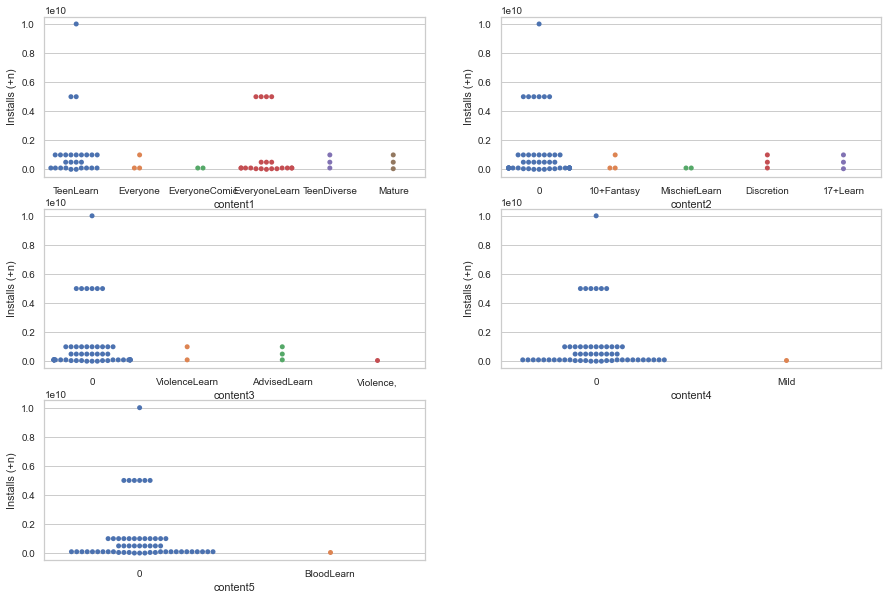

In [77]:
plt.subplot(3,2,1)
sns.swarmplot(data=df, x='content1', y='Installs (+n)')
plt.subplot(3,2,2)
sns.swarmplot(data=df, x='content2', y='Installs (+n)')
plt.subplot(3,2,3)
sns.swarmplot(data=df, x='content3', y='Installs (+n)')
plt.subplot(3,2,4)
sns.swarmplot(data=df, x='content4', y='Installs (+n)')
plt.subplot(3,2,5)
sns.swarmplot(data=df, x='content5', y='Installs (+n)')


<AxesSubplot:xlabel='content_counts', ylabel='Installs (+n)'>

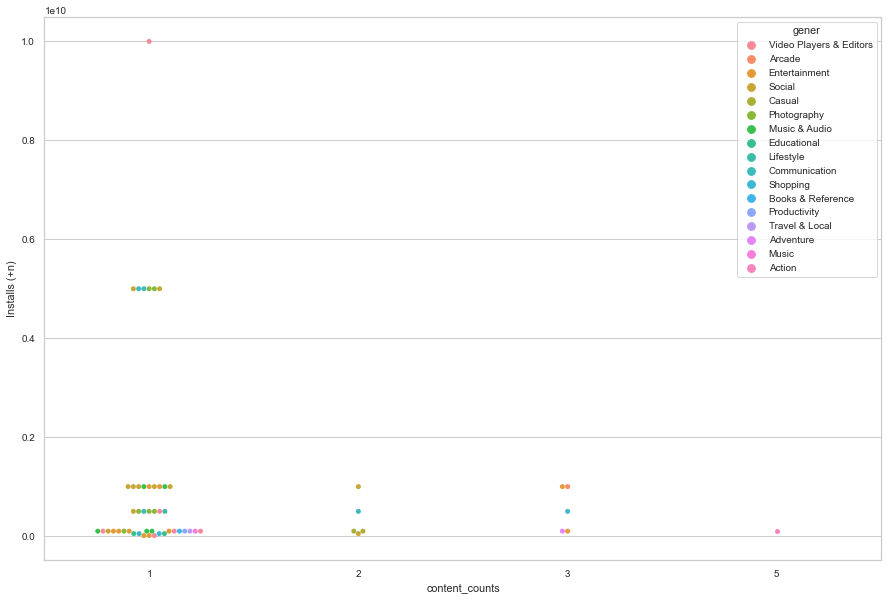

In [78]:
sns.swarmplot(data=df, x='content_counts', y='Installs (+n)', hue='gener')

# Conclusion:
for your app to have highest number of installs:

- NO. OF COMMENTS: high no of installs require high noOfComments
- DEVELOPING COMPANY: not a must to be a very popular company to have the largest installs, 
- RATING: rating is not actually a very determinant property since there exists a wide range ofratings for highly installed apps (over 500,000,000 installs) you could have a bad reputition and still have large number of installs
- ANDROID VERSION SUPPORTED: the android version of highest installations is the 4.0 and above
- RECENT UPDATES: communication apps although are considered to be updated not so much often it has high number of installs
- GENRE: the communication genre is the genre having both highest number of installs and highest number of comments too
- APPEARING UNDER TITLE: the number of installs in Recommended for you has very high number of installs as well as take better photos section
- APPEARING UNDER MULTIPLE TITLES: when the app is recommended repeatedly under different titles most probably will have higher chance to be installed
- PURCHASES VALUES: not having purchases isn't a must since some of the apps containing purchases had high installations but what is most common is to have low purchases values
- NUMBER OF INTERACTIVE ELEMENTS: the strange thing is there only exist some outliers on considering the number of installs and the interactive elements found, however the app of highest instalations has 2 interactive elements and it is under Video Player and Editors gener
- TYPE OF INTERACTIVE ELEMENTS: the application having the highest installs (had 2 elements) had user interacting, Digital purchase interactive elements
- SIZE: size of highest installations is: the one which varies with device, so the best combination is: size: varies with device, android version supported:4.2 and up
- CONTENT: it is much better to concentrate on a single content in your application to be able to gain high number of installs (remember one done perfect always better than many incomplete)

# so the best combination is:
| **App Property** | **Best to have/ be** |
| --- | --- |
| **No of comments** | high no of comments |
| **Developing company** | doesn't matter |
| **Rating** | the value of rating is not always correlated with the success of your app but in general high ratings means more viewing means a higher chance for app downloading |
| **Android Version** | 4.0 and above |
| **Recent updates** | updating time must not be so near as long as you develope continuously |
| **Gener** | communication genre |
| **appearing under title** | would better to be under recomended for you |
| **appearing under multiple titles** | better to appear under more than 1 |
| **Purchase Values** | if you want to add purchases keep the value as low as possible (between 0 and 1) |
| **Number of interactive elements** | 2 is the best choice |
| **Types of best interactive elements** |  user interacting, Digital purchase |
| **application size** | keep it varying with device |
| **Content** | concentrate on only one content to provide |

# Returning back to the data preprocessing:
### *(Make the data a perfect match for my machine learning model)*

In [22]:
df.iloc[0]

app_name                                     YouTube
app_company                               Google LLC
app_rating                                       4.3
underTitle                       Recommended for you
gener                        Video Players & Editors
noOfComments                               121306065
size                              Varies with device
android_Version_Supported         Varies with device
Interactive_elem1                     Users Interact
Interactive_elem2                  Digital Purchases
Interactive_elem3                                  0
Interactive_elem4                                  0
elem_counts                                        2
content1                                           T
content2                                           0
content3                                           0
content4                                           0
content5                                           0
content_counts                                

### 3- working with categorical data:
#### [i] working with ordinal data:

In [23]:
size_keys = ['Varies with device', '174M', '135M','133M', '132M','126M', '125M','103M','101M', '87M','78M','74M', '57M','52M','24M']
size_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
sizes = dict(zip(size_keys, size_values))
res = []
for i in df['size']:
    res.append(sizes[i])
df['app_size_cat']=res
df = df.drop('size', axis=1)

In [24]:
androidV_keys = ['Varies with device', '4.0 and up', '4.1 and up','4.2 and up', '4.4 and up','5.0 and up', '6.0 and up']
androidV_values = [6, 4, 7, 2, 5, 3, 1]
androidV = dict(zip(androidV_keys, androidV_values))
res = []
for i in df['android_Version_Supported']:
    res.append(androidV[i])
df['androidV_cat']=res
df = df.drop('android_Version_Supported', axis=1)
df.iloc[0]

df.iloc[0]

app_name                                 YouTube
app_company                           Google LLC
app_rating                                   4.3
underTitle                   Recommended for you
gener                    Video Players & Editors
noOfComments                           121306065
Interactive_elem1                 Users Interact
Interactive_elem2              Digital Purchases
Interactive_elem3                              0
Interactive_elem4                              0
elem_counts                                    2
content1                                       T
content2                                       0
content3                                       0
content4                                       0
content5                                       0
content_counts                                 1
days_from_last_update                         14
year                                        2021
month                                          8
day                 

#### [ii] working with nominal categories:

In [25]:
df = pd.get_dummies(df, columns=['underTitle','gener','Interactive_elem1','Interactive_elem2','Interactive_elem3','Interactive_elem4','content1','content2','content3','content4','content5'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   app_name                               57 non-null     object 
 1   app_company                            57 non-null     object 
 2   app_rating                             57 non-null     float64
 3   noOfComments                           57 non-null     int64  
 4   elem_counts                            57 non-null     int64  
 5   content_counts                         57 non-null     int64  
 6   days_from_last_update                  57 non-null     int64  
 7   year                                   57 non-null     int64  
 8   month                                  57 non-null     int64  
 9   day                                    57 non-null     int64  
 10  Installs (+n)                          57 non-null     int64  
 11  min_in-a

In [26]:
df.columns

Index(['app_name', 'app_company', 'app_rating', 'noOfComments', 'elem_counts',
       'content_counts', 'days_from_last_update', 'year', 'month', 'day',
       'Installs (+n)', 'min_in-app_purchases', 'max_in-app_purchases',
       'app_size_cat', 'androidV_cat', 'underTitle_Entertainment',
       'underTitle_Popular apps & games', 'underTitle_Recommended for you',
       'underTitle_Share photos & videos', 'underTitle_Social networking',
       'underTitle_Take better photos', 'underTitle_Video editors & players',
       'gener_Adventure', 'gener_Arcade', 'gener_Books & Reference',
       'gener_Casual', 'gener_Communication', 'gener_Educational',
       'gener_Entertainment', 'gener_Lifestyle', 'gener_Music',
       'gener_Music & Audio', 'gener_Photography', 'gener_Productivity',
       'gener_Shopping', 'gener_Social', 'gener_Travel & Local',
       'gener_Video Players & Editors', 'Interactive_elem1_Digital Purchases',
       'Interactive_elem1_In-App Purchases',
       'Interacti

In [27]:
df2 = df
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   app_name                               57 non-null     object 
 1   app_company                            57 non-null     object 
 2   app_rating                             57 non-null     float64
 3   noOfComments                           57 non-null     int64  
 4   elem_counts                            57 non-null     int64  
 5   content_counts                         57 non-null     int64  
 6   days_from_last_update                  57 non-null     int64  
 7   year                                   57 non-null     int64  
 8   month                                  57 non-null     int64  
 9   day                                    57 non-null     int64  
 10  Installs (+n)                          57 non-null     int64  
 11  min_in-a

#### 4- Feature scaling:

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit((df2['noOfComments'].values).reshape(-1,1))
df2['noOfComments'] = scaler.transform((df2['noOfComments'].values).reshape(-1,1))

In [29]:
df2['noOfComments']

0     0.845365
1     0.252181
2     0.083279
3     0.860653
4     0.026681
5     0.836955
6     0.260283
7     0.162816
8     0.015115
9     0.014913
10    0.188151
11    0.057379
12    0.075988
13    0.030977
14    0.860656
15    0.076153
16    0.000000
17    0.080371
18    0.016149
19    0.002632
20    0.162816
21    0.008157
22    0.020259
23    0.011314
24    0.084877
25    0.022906
26    0.035257
27    0.000795
28    0.030977
29    0.083279
30    0.003131
31    0.554541
32    0.022906
33    0.084538
34    0.032968
35    0.074962
36    0.029837
37    0.023887
38    0.021203
39    0.836953
40    0.128866
41    0.015217
42    0.133734
43    0.017617
44    1.000000
45    0.163638
46    0.015116
47    0.017433
48    0.000795
49    0.085978
50    0.008270
51    0.133734
52    0.006522
53    0.016051
54    0.260282
55    0.049818
56    0.074962
Name: noOfComments, dtype: float64

<AxesSubplot:>

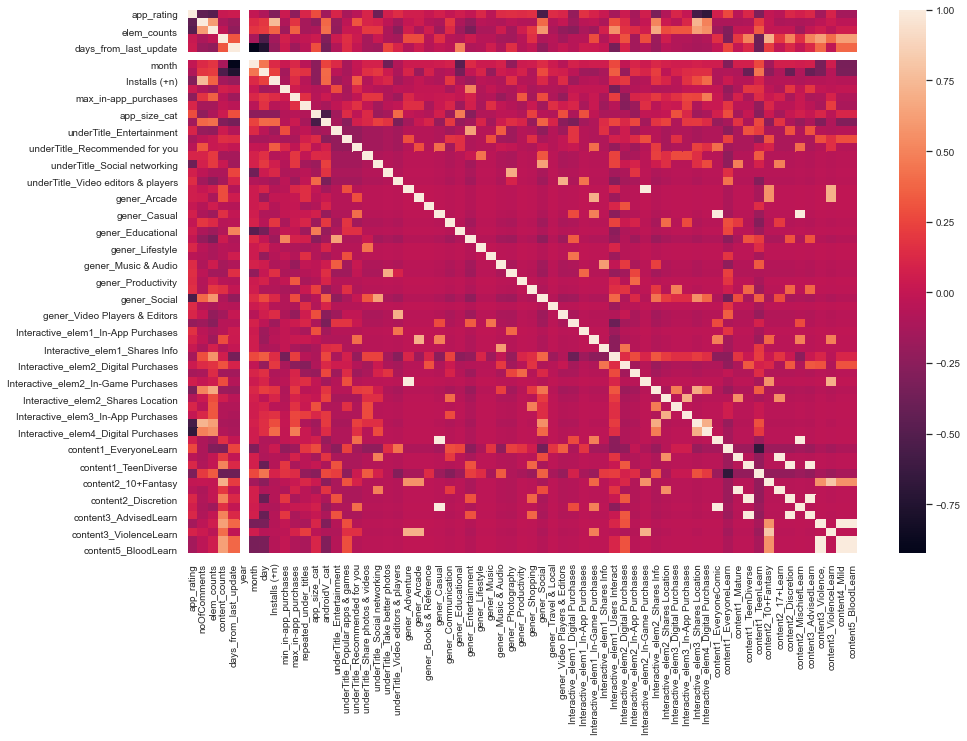

In [87]:
sns.heatmap(df2.corr())

### 4- Split to features and target feature:

In [33]:
df2 = df2.drop(['app_name', 'app_company'], axis=1)

In [34]:
x = df2.drop('Installs (+n)', axis=1)
y = df2['Installs (+n)']

### 5- Split to train and test:

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

y_train = y_train.values.reshape(y_train.shape[0],1)
print(f'X_train dimensions: {x_train.shape}  -  Y_train dimensions: {y_train.shape}')
y_test = y_test.values.reshape(y_test.shape[0],1)
print(f'X_test dimensions: {x_test.shape}  -  Y_test dimensions: {y_test.shape}')

X_train dimensions: (45, 62)  -  Y_train dimensions: (45, 1)
X_test dimensions: (12, 62)  -  Y_test dimensions: (12, 1)


### befor performing feature reduction, let's try to visualize our data at low dimensions:

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x.values)
df2['pca-one'] = pca_result[:,0]
df2['pca-two'] = pca_result[:,1] 
df2['pca-three'] = pca_result[:,2]

In [37]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.98260149 0.0148867  0.00105063]


In [38]:
y.unique()

array([10000000000,  1000000000,   100000000,  5000000000,    50000000,
         500000000,    10000000], dtype=int64)

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

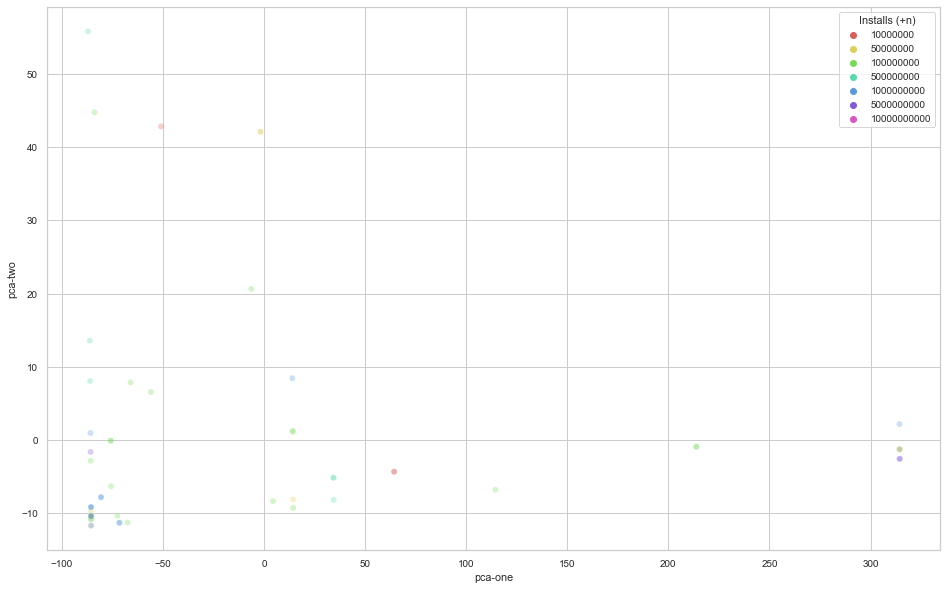

In [39]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='Installs (+n)',
    palette=sns.color_palette("hls",7),
    data=df2.loc[:],
    legend="full",
    alpha=0.3
)

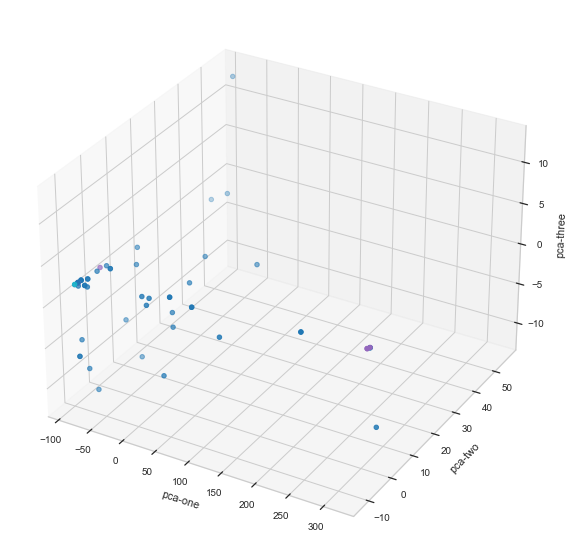

In [40]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df2.loc[:]["pca-one"], 
    ys=df2.loc[:]["pca-two"], 
    zs=df2.loc[:]["pca-three"], 
    c=df2.loc[:]["Installs (+n)"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### 6- Feature Reduction:
## -3- perform dimentionality reduction to remove unnecessary features

In [42]:
# app name isn't really a very importnat feature unless we are using NLP to specify reviews about the app name it self
# Feature reduction:
df2 = df2.drop(['year'], axis=1)
#df = df.drop(['app_name','app_company','year'], axis=1)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x_train)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test) 
print(pca.explained_variance_ratio_)
print(len(x_train))

[9.90217432e-01 8.57318750e-03 7.01621883e-04 3.74343165e-04
 5.11276056e-05 2.41772029e-05 2.19043427e-05 1.35774628e-05
 9.66557234e-06 6.86248116e-06]
45


In [44]:
pca.singular_values_

array([529.64594746,  49.28236387,  14.09846832,  10.29805778,
         3.80581871,   2.61711856,   2.49106742,   1.96123521,
         1.65475674,   1.39431517])

# Step 5: Model Training: 57 row X 10 features + Y

## -1- predicting the number of installs for a given unknown application
### a) Logistic Regression:

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred = linReg.predict(x_test)

print(f'Training Score: {linReg.score(x_train, y_train)} \n')
print(f'Test Score: {linReg.score(x_test, y_test)} \n')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}\n')

print(f'coefficients: {linReg.coef_}\n')
print(f'b (interception): {linReg.intercept_}\n') #underfitting this MSE is very large !!!!!!!!!!

Training Score: 0.32553952959269117 

Test Score: -0.5022664483797297 

Root Mean Square Error: 2187608619.8415265

coefficients: [[ 1.84723832e+06 -2.47920272e+07  6.84492108e+07 -1.04580162e+08
  -1.14443191e+08  2.83999915e+08 -3.03764906e+08 -3.74598733e+07
   1.20759557e+09 -7.75340754e+06]]

b (interception): [1.02733333e+09]



### 2- Gradient Descent: Polynomial Regression:

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

linReg.fit(x_train_poly, y_train)
y_pred = linReg.predict(x_test_poly)

print(f'Training Score: {linReg.score(x_train_poly, y_train)}\n')
print(f'Test Score: {linReg.score(x_test_poly, y_test)}\n')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}\n')
# overfitting

Training Score: 1.0

Test Score: -310752.1536855139

Root Mean Square Error: 994956089578.5231



### 3- Gradient Descent: SVM - Linear:

In [47]:
from sklearn.svm import SVR

svm = SVR(kernel='linear') # select linear kernel since the distribution of datapoints is linear
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  #underfitting

Training Score: -0.07565544635023769
Test Score: -0.09641416503963773
Root Mean Square Error: 1868888798.065913


D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Gradient Descent: SVM - Poly:

In [48]:
svm = SVR(kernel='poly', degree=7, gamma='scale') 
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  #underfitting

Training Score: -0.07546412977525918
Test Score: -0.09622509002534207
Root Mean Square Error: 1868727647.55231


D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [49]:
svm = SVR(kernel='rbf', gamma='scale') 
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') # still underfitting

Training Score: -0.07564908192730413
Test Score: -0.09640254831337636
Root Mean Square Error: 1868878897.415329


D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Gradient Descent: SVM - sigmoid:

In [50]:
svm = SVR(kernel='sigmoid', gamma='scale') 
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # another underfitting

Training Score: -0.07564908270120352
Test Score: -0.09640254950987837
Root Mean Square Error: 1868878898.435081


D:\Anaconda3\envs\MLenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 5- Decision Tree:

In [51]:
from sklearn.tree import DecisionTreeRegressor

DecTree = DecisionTreeRegressor()
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)

print(f'Training Score: {DecTree.score(x_train, y_train)}')
print(f'Test Score: {DecTree.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # this is over fitting   

Training Score: 1.0
Test Score: -2.544130229820536
Root Mean Square Error: 3360090524.5742016


### 6- Random Forest Regressor:

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#X, Y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=9, random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print(f'Training Score: {regr.score(x_train, y_train)}')
print(f'Test Score: {regr.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # this is over fitting a little bit better  

D:\Anaconda3\envs\MLenv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training Score: 0.8715107983267226
Test Score: -0.8028741716789232
Root Mean Square Error: 2396507820.4036508


would select the random forest regressor untill I am able to scrap more data

In [ ]:
2396339157.617997

## -2- clustering applications according to number of installs:

In [53]:
y.unique() # so we could have 7 clusters

array([10000000000,  1000000000,   100000000,  5000000000,    50000000,
         500000000,    10000000], dtype=int64)

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(x_train)
y_pred = kmeans.predict(x_test)
kmeans.cluster_centers_

print(f'Training Score: {kmeans.score(x_train, y_train)}')
print(f'Test Score: {kmeans.score(x_test, y_test)}') 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'rmse: {rmse}')

Training Score: -7391.941462047499
Test Score: -13369.287860578672
rmse: 1105629978.6313722
